# Two Factor ANOVA


### Green House Gasses
![](https://image.slidesharecdn.com/greenhouseeffect-140109053434-phpapp02/95/greenhouse-effect-1-638.jpg?cb=1389245852)


Considering the __Fertilizer Treatment__ with the addition of the plant specieis impacting the plant height

Basically, we are performing __Two-way (two factor) ANOVA__ wher we can simultaneously evaluate how type of `plant species` and `fert` affect the plant `height`. 

source: [PSU Stats 502 Factorial Treatment Designs](https://newonlinecourses.science.psu.edu/stat502/node/154/)

In [51]:
# http://www.pybloggers.com/2016/03/three-ways-to-do-a-two-way-anova-with-python/
import pandas as pd
import seaborn as sns
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt
from scipy import stats

In [22]:
df = pd.read_csv("./data/greenhouse.csv")
df.head()

,fert,species,height
0,control,SppA,21.0
1,control,SppA,19.5
2,control,SppA,22.5
3,control,SppA,21.5
4,control,SppA,20.5


Graph the ferterlizer data to preview/visualize the factoral data. We are using `statsmodels interaction_plot`.

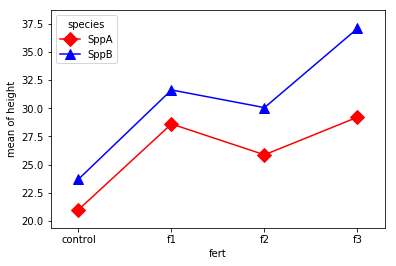

In [12]:
fig = interaction_plot(df.fert, df.species, df.height,
             colors=['red','blue'], markers=['D','^'], ms=10)

In the above interaction graph, the `species` appear to be parallel indicating a __small effact__ in the `control` and as you go from `f1` to `f3` the effect become larger and larger, __with no interaction__



Generate box plot to assess data distribution to assess difference between differnt groups

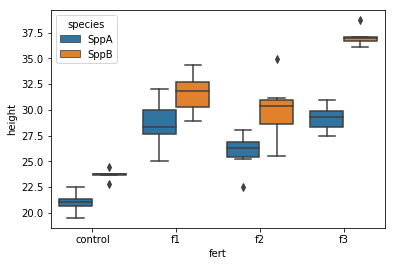

In [57]:
sns.boxplot('fert', 'height', hue='species', data = df)

### Two Factor Factorial Model
use the method `type = 3` that provide us the `F test` calculation. And we specify two factors as class variables because they are categorical. 

In [42]:
model = ols('height ~ fert + species + fert*species', data=df).fit()
aov_table = anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
fert,745.437500,3.0,73.098232,2.765659e-16
species,236.740833,1.0,69.645020,2.706508e-10
fert:species,50.584167,3.0,4.960326,5.080577e-03
Residual,135.970000,40.0,NaN,NaN


## Conclusion
we see that the __interaction term__ `fert*species` __is significant__. As a rule we __interprept the first interaction term__. We dont have to assess `fert` or `species` since the interaction term is significant because, the interaction term tells us that the effect of the levels of `fert` depends on what level `specieis` is being considered (and vice-versa)

QQ PLot using statsmodels

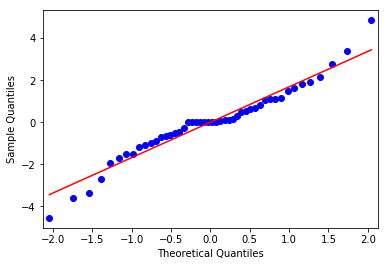

In [29]:
res = model.resid 
fig = sm.qqplot(res, line='s')
plt.show()

### Ad-hoc Testing
Since there was a significnat interaction from the ANOVA model, we can now perform adhoc tesing to assess whether the factor level of `fert` and `specieis` have a role on height. 

In [44]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [50]:
df_melt = pd.melt(df.reset_index(), id_vars = ['height'], value_vars=['fert', 'species'])
df_melt.head()

,height,variable,value
0,21.0,fert,control
1,19.5,fert,control
2,22.5,fert,control
3,21.5,fert,control
4,20.5,fert,control


group1,group2,meandiff,lower,upper,reject
SppA,SppB,4.4417,1.1796,7.7037,True
SppA,control,-3.8167,-7.8118,0.1785,False
SppA,f1,3.9417,-0.0535,7.9368,False
SppA,f2,1.7917,-2.2035,5.7868,False
SppA,f3,6.9667,2.9715,10.9618,True
SppB,control,-8.2583,-12.2535,-4.2632,True
SppB,f1,-0.5,-4.4952,3.4952,False
SppB,f2,-2.65,-6.6452,1.3452,False
SppB,f3,2.525,-1.4702,6.5202,False
control,f1,7.7583,3.1451,12.3716,True


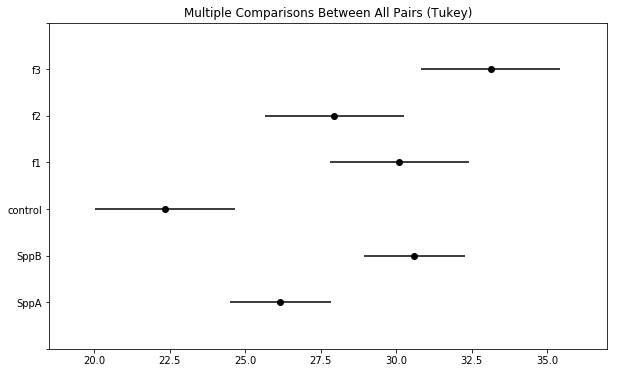

In [66]:
tukey = pairwise_tukeyhsd(endog=df_melt['height'],     # Data
                          groups=df_melt['value'],   # Groups
                          alpha=0.05)          # Significance level

tukey.plot_simultaneous()    # Plot group confidence intervals
plt.vlines(x=6.7,ymin=-0.5,ymax=4.5, color="red")

tukey.summary()              # See test summary